In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv("./data.csv")
df = df.sample(frac = 1)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
832,832,176,171,151,170,165,145,155,149,133,...,192,201,196,197,206,205,201,210,209,0
914,914,50,43,14,54,47,18,76,69,40,...,192,166,133,194,167,140,191,165,140,0
1,1,32,16,3,31,15,2,32,16,3,...,220,239,217,222,241,219,223,242,220,1
432,432,166,111,81,164,110,78,167,109,76,...,49,20,25,45,21,28,44,24,33,1
969,969,90,70,71,111,91,92,123,105,103,...,41,18,10,41,14,7,38,11,4,0


In [21]:
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,...,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,631.500000,84.766614,79.029272,78.389241,80.353639,74.598101,73.880538,75.545886,69.531646,69.156646,...,138.889241,123.958861,116.555380,138.738924,123.784019,116.864715,137.962816,123.270570,116.268196,0.500000
std,365.029679,74.574285,72.135242,69.625741,71.916392,69.479822,67.020547,68.427371,66.139172,63.799722,...,80.604036,77.367525,76.286351,80.610339,77.456355,76.236920,80.522449,77.259675,76.048200,0.500198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,315.750000,28.000000,25.000000,27.000000,28.000000,25.000000,25.750000,26.000000,24.000000,25.000000,...,57.000000,54.000000,47.750000,57.000000,51.000000,48.000000,59.750000,51.750000,50.000000,0.000000
50%,631.500000,55.000000,52.000000,54.000000,51.000000,46.000000,49.000000,49.000000,43.500000,46.000000,...,155.000000,130.000000,112.500000,153.000000,125.000000,111.000000,151.000000,125.000000,109.000000,0.500000
75%,947.250000,127.000000,114.000000,112.000000,119.000000,101.000000,97.000000,106.000000,90.000000,90.250000,...,212.000000,188.250000,177.000000,211.000000,190.000000,181.000000,210.250000,190.000000,180.250000,1.000000
max,1263.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.000000


In [22]:
x=df.iloc[:,:-1]
y=df["12288"]
y

832    0
914    0
1      1
432    1
969    0
      ..
151    1
505    1
70     1
20     1
394    1
Name: 12288, Length: 1264, dtype: int64

In [23]:
x,test_x,y,test_y = train_test_split( x, y, test_size=0.2, random_state=0)

In [24]:
pca = PCA(0.95)
pca.fit(x)
x_pca = pca.transform(x)
test_x_pca = pca.transform(test_x)
print(f"Variance covered by PCA   : {sum(pca.explained_variance_ratio_ * 100)}")
print(f"12288 Dimensions reduced to : {len(x_pca[0])}")

Variance covered by PCA   : 95.00288764530836
12288 Dimensions reduced to : 123


In [25]:
x_pca = pd.DataFrame(data=x_pca)
test_x_pca=pd.DataFrame(data=test_x_pca)

In [26]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,-1036.988779,2692.678981,3420.900358,-888.014875,-1113.951045,2807.133245,3377.513695,-1464.675013,-289.580176,213.117662,...,197.235981,-158.538608,-163.117598,164.336640,147.054111,-82.378241,198.517965,78.269472,-175.620422,55.311493
1,4921.428929,886.244409,183.700845,425.485301,383.917241,1662.479445,-1371.607531,569.768303,154.042680,161.694165,...,-39.313384,-153.186006,-188.777539,62.442820,-103.746387,131.804024,49.645063,-10.451518,-10.949770,-199.128270
2,942.126455,1628.882280,-1810.514571,579.381758,-4709.759817,-741.682166,296.041706,-1091.611557,-408.265586,-1206.627040,...,144.727756,34.470293,-124.779669,100.398109,-66.607898,112.060416,114.169405,-100.108376,-75.781025,-87.796256
3,-905.546255,-2176.183527,-779.073629,-3038.482965,1503.399469,1601.494653,24.023647,380.595853,-776.915624,416.780648,...,-23.997323,67.162909,241.922331,-113.451923,-209.791171,-166.795881,-267.657597,-50.719785,164.450806,226.605368
4,4624.850863,156.089424,-1299.290428,439.096417,3403.753387,-389.768351,-1438.531334,646.126079,1053.596170,-961.073890,...,123.000738,-164.072584,-141.123491,-266.234791,-62.946049,-132.851435,74.984740,174.026308,255.520992,-323.448398


In [27]:
# MLP
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()
clf_pca = MLPClassifier()
clf.fit(x,y)
clf_pca.fit(x_pca,y)

MLPClassifier()

In [28]:
y_pred_pca = clf_pca.predict(test_x_pca)
y_pred = clf.predict(test_x)

In [29]:
#Logistic Regeression
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)
clf_lr_pca = LogisticRegression(random_state=0)
clf_lr.fit(x, y)
clf_lr_pca.fit(x_pca,y)

C:\Users\tyagi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tyagi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(random_state=0)

In [30]:
y_pred_lr=clf_lr.predict(test_x)
y_pred_lr_pca=clf_lr_pca.predict(test_x_pca)

In [31]:
#SVM
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear', probability=True)
clf_svm_pca = SVC(kernel='linear', probability=True)
clf_svm.fit(x, y)
clf_svm_pca.fit(x_pca,y)

SVC(kernel='linear', probability=True)

In [32]:
#svm
y_pred_svm_pca=clf_svm_pca.predict(test_x_pca)
y_pred_svm=clf_svm.predict(test_x)

In [33]:
print(f"Accuracy by MLP without PCA : {accuracy_score(test_y, y_pred)}")
print(f"Accuracy by MLP with PCA    : {accuracy_score(test_y, y_pred_pca)}")
print(f"Accuracy by SVM without PCA : {accuracy_score(test_y, y_pred_svm)}")
print(f"Accuracy by SVM with PCA    : {accuracy_score(test_y, y_pred_svm_pca)}")
print(f"Accuracy by Logistic Regression without PCA : {accuracy_score(test_y, y_pred_lr)}")
print(f"Accuracy by Logistic Regression with PCA    : {accuracy_score(test_y, y_pred_lr_pca)}")

print("\n")
print("With 5 Fold Cross Validation")

print(f"Accuracy by MLP without PCA : {cross_val_score(clf, test_x, test_y, cv=5).mean()}")
print(f"Accuracy by MLP with PCA    : {cross_val_score(clf_pca, test_x, test_y, cv=5).mean()}")
print(f"Accuracy by SVM without PCA : {cross_val_score(clf_svm, test_x, test_y, cv=5).mean()}")
print(f"Accuracy by SVM with PCA    : {cross_val_score(clf_svm_pca, test_x, test_y, cv=5).mean()}")
print(f"Accuracy by Logistic Regression without PCA : {cross_val_score(clf_lr, test_x, test_y, cv=5).mean()}")
print(f"Accuracy by Logistic Regression with PCA    : {cross_val_score(clf_lr_pca, test_x, test_y, cv=5).mean()}")

Accuracy by MLP without PCA : 0.49407114624505927
Accuracy by MLP with PCA    : 0.83399209486166
Accuracy by SVM without PCA : 0.9604743083003953
Accuracy by SVM with PCA    : 0.9644268774703557
Accuracy by Logistic Regression without PCA : 0.9565217391304348
Accuracy by Logistic Regression with PCA    : 0.9723320158102767


With 5 Fold Cross Validation
Accuracy by MLP without PCA : 0.5100392156862745
Accuracy by MLP with PCA    : 0.4901960784313726
Accuracy by SVM without PCA : 0.8890196078431373
Accuracy by SVM with PCA    : 0.8890196078431373
C:\Users\tyagi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

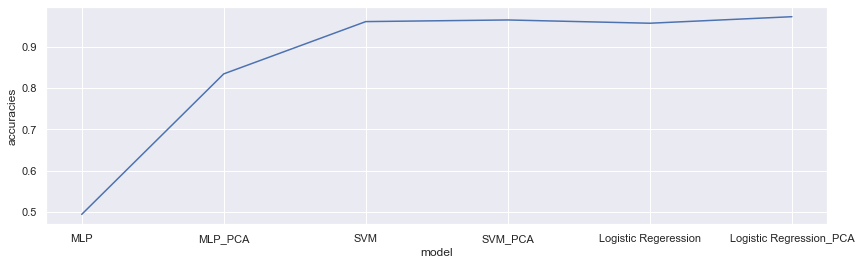

In [34]:
plot_data = {
  "model" : ['MLP','MLP_PCA','SVM','SVM_PCA','Logistic Regeression','Logistic Regression_PCA'] ,
  "accuracies": [accuracy_score(test_y, y_pred),accuracy_score(test_y, y_pred_pca),accuracy_score(test_y, y_pred_svm),accuracy_score(test_y, y_pred_svm_pca),accuracy_score(test_y, y_pred_lr),accuracy_score(test_y, y_pred_lr_pca)]
}

sns.set_theme(style="darkgrid")
plot_data=pd.DataFrame(plot_data)
plt.figure(figsize=(14,4))
sns.lineplot(data=plot_data, x="model", y="accuracies", markers=["o", "o"])
plt.show()